### TESTING compvis stuff on dices


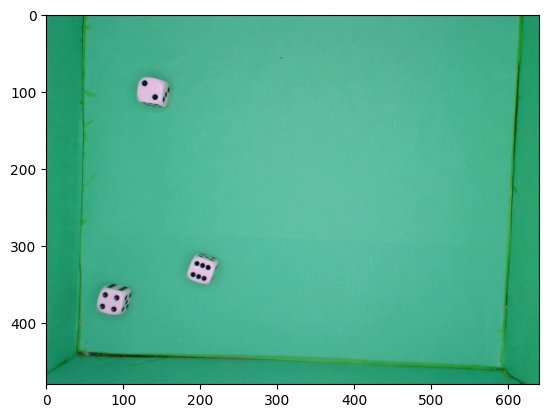

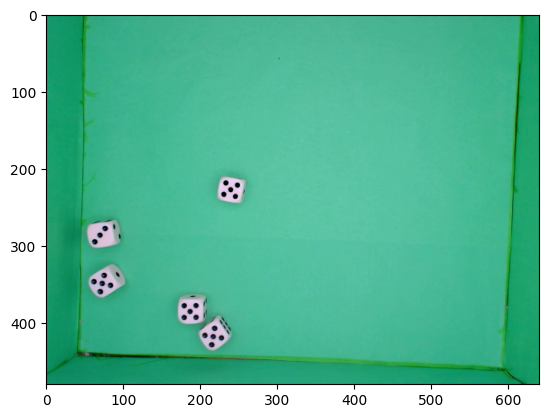

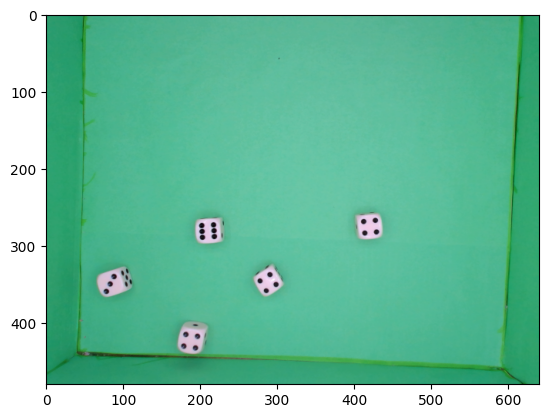

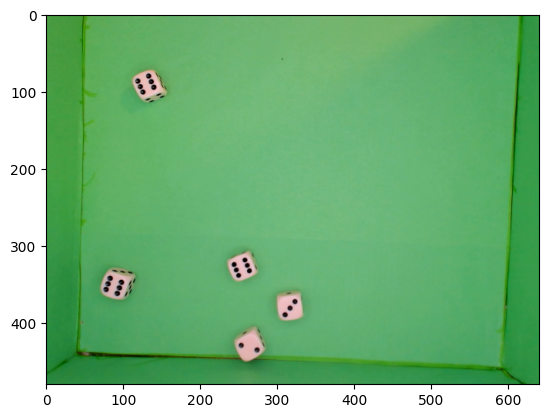

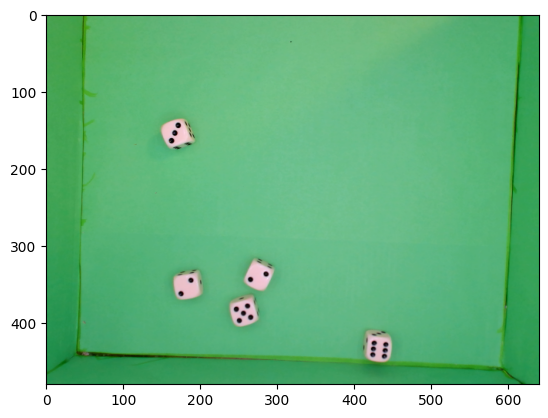

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/home/bule/projects/Dice/data/eyes2/still"
images = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images.append(img)
for img in images[:5]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

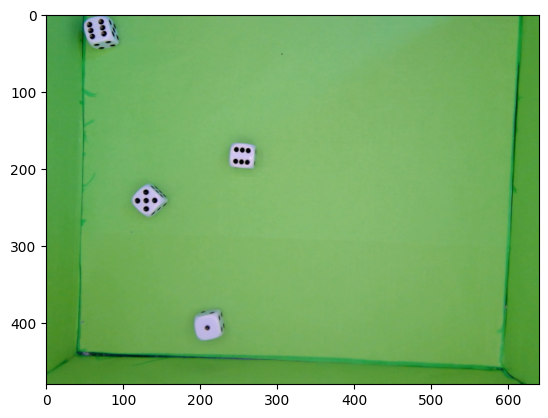

In [3]:
path = "/home/bule/projects/Dice/data/eyes2/still"
images = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images.append(img)
        
testimdices=images[8]#[100:350]
plt.imshow(testimdices)
plt.show()
# testimdbg=images[7]#[100:350]
# plt.imshow(testimdbg)
# plt.show()


In [116]:
import numpy as np

# Define the lower and upper bounds for the green color range
# lower_bound = np.array([0, 80, 0])
# upper_bound = np.array([170, 255, 255])


lower_bound = np.array([0, 80, 0])
upper_bound = np.array([170, 255, 255])

# Loop through each image in images
for img in images[:]:
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Create a mask of the green background
    bg_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Invert the mask to get the mask of the dices
    dices_mask = cv2.bitwise_not(bg_mask)

    # Remove the background from the dices image
    dices_no_bg = cv2.bitwise_and(img, img, mask=dices_mask)

    # Display the result
    plt.imshow(cv2.cvtColor(dices_no_bg, cv2.COLOR_RGB2BGR))
    plt.show()


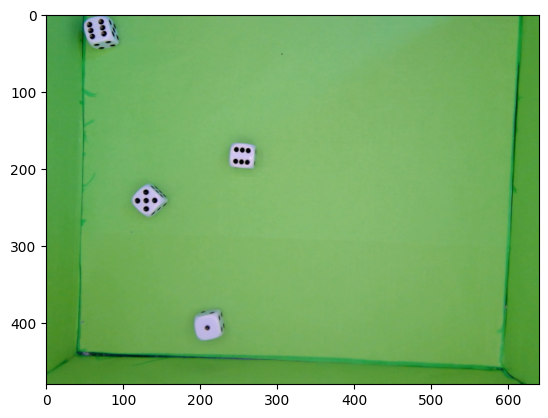

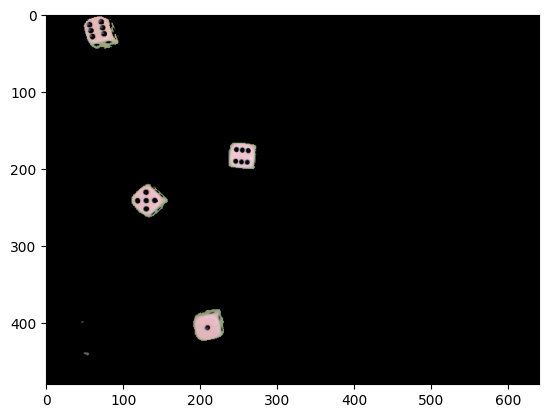

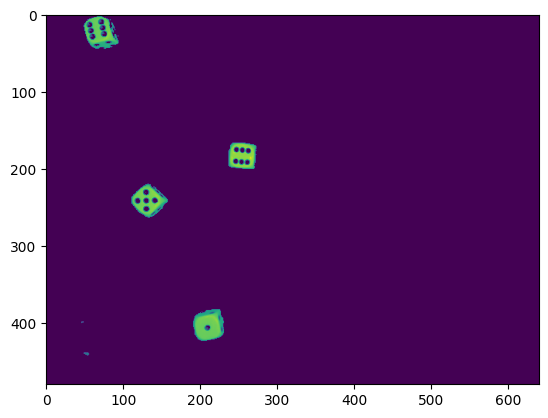

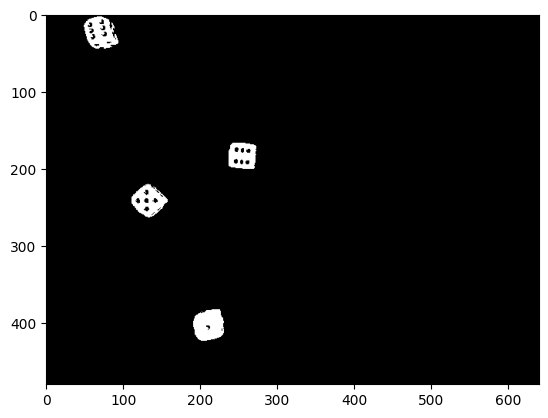

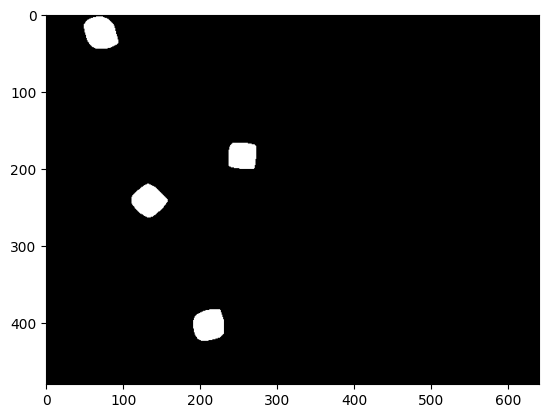

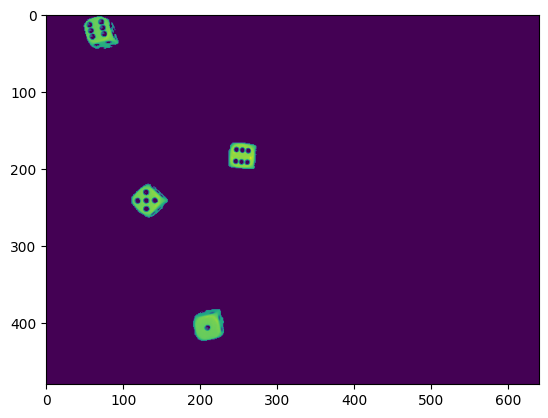

In [4]:
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images.append(img)


img=images[8]


plt.imshow(img)
plt.show()

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower_bound = np.array([0, 80, 0])
upper_bound = np.array([170, 255, 255])

# Create a mask of the green background
bg_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Invert the mask to get the mask of the dices
dices_mask = cv2.bitwise_not(bg_mask)

# Remove the background from the dices image
dices_no_bg = cv2.bitwise_and(img, img, mask=dices_mask)

# Display the result
plt.imshow(cv2.cvtColor(dices_no_bg, cv2.COLOR_RGB2BGR))
plt.show()



testimdices_gray=cv2.cvtColor(dices_no_bg, cv2.COLOR_RGB2GRAY)
plt.imshow(testimdices_gray)
plt.show()

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(testimdices_gray, connectivity=8)

# Create an output image initialized to zero
output_image = np.zeros_like(testimdices_gray)

for i in range(1, num_labels):  # Start from 1 to ignore the background component
    if stats[i, cv2.CC_STAT_AREA] >= 50:
        output_image[labels == i] = 255  # Keep this connected component

# # Invert the output image
#output_image = 255 - output_image

binary_mask = np.uint8(output_image > 0)
plt.imshow(binary_mask, cmap='gray')
plt.show()


# Find contours in the binary image
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask for the convex hulls
hull_mask = np.zeros_like(binary_mask)

# Loop over each contour
for contour in contours:
    # Calculate the convex hull of the contour
    hull = cv2.convexHull(contour)
    # Draw the convex hull on the mask
    cv2.drawContours(hull_mask, [hull], -1, (255), thickness=cv2.FILLED)
    
plt.imshow(hull_mask, cmap='gray')
plt.show()

cuttedgray=testimdices_gray.copy()

cuttedgray[hull_mask==0]=0
plt.imshow(cuttedgray)


found 3 dices


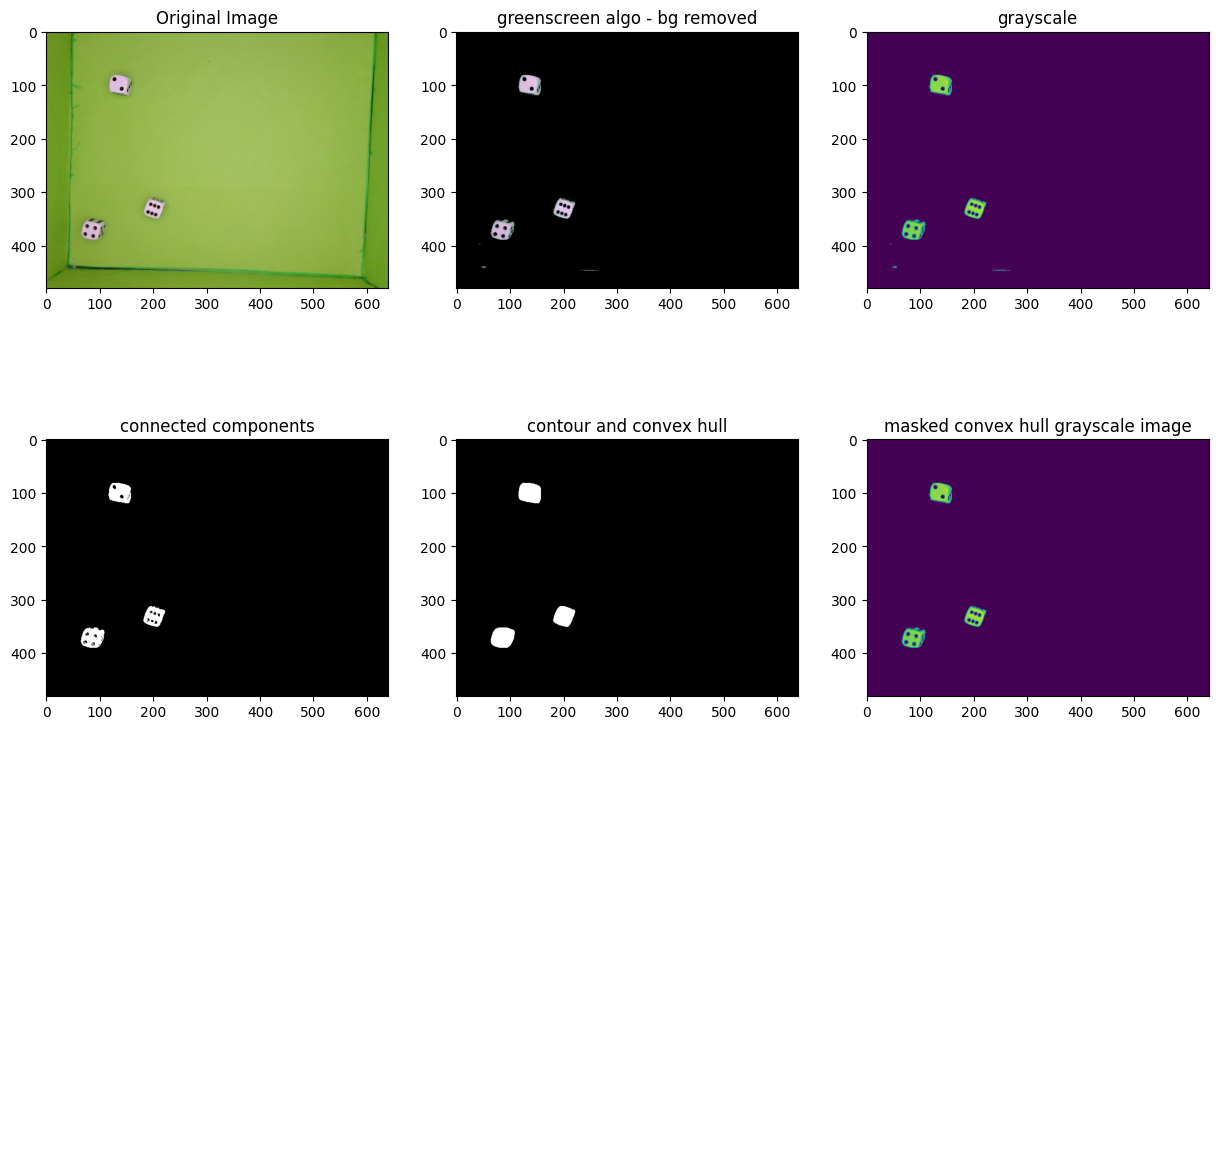

found 5 dices
found 5 dices
found 5 dices
found 5 dices
found 4 dices
found 5 dices
found 5 dices
found 4 dices
found 5 dices
found 5 dices
found 5 dices
found 5 dices
found 2 dices
found 5 dices
found 5 dices
found 5 dices
found 1 dices
found 5 dices


In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images.append(img)


for img in images[:19]:

    axs[0, 0].imshow(img)
    axs[0, 0].set_title('Original Image')

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    lower_bound = np.array([0, 80, 0])
    upper_bound = np.array([170, 255, 255])

    # Create a mask of the green background
    bg_mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Invert the mask to get the mask of the dices
    dices_mask = cv2.bitwise_not(bg_mask)

    # Remove the background from the dices image
    dices_no_bg = cv2.bitwise_and(img, img, mask=dices_mask)

    # Display the result
    axs[0, 1].imshow(cv2.cvtColor(dices_no_bg, cv2.COLOR_RGB2BGR))
    axs[0, 1].set_title('greenscreen algo - bg removed')

    testimdices_gray=cv2.cvtColor(dices_no_bg, cv2.COLOR_RGB2GRAY)

    axs[0, 2].imshow(testimdices_gray)
    axs[0, 2].set_title('grayscale')

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(testimdices_gray, connectivity=8)

    # Create an output image initialized to zero
    output_image = np.zeros_like(testimdices_gray)


    dicecount=0
    for i in range(1, num_labels):  # Start from 1 to ignore the background component
        if stats[i, cv2.CC_STAT_AREA] >= 80:
            output_image[labels == i] = 255  # Keep this connected component
            dicecount+=1

    print(f'found {dicecount} dices')
    # # Invert the output image
    #output_image = 255 - output_image

    binary_mask = np.uint8(output_image > 0)
    axs[1, 0].imshow(binary_mask, cmap='gray')
    axs[1, 0].set_title('connected components')

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask for the convex hulls
    hull_mask = np.zeros_like(binary_mask)

    cuttedgray=testimdices_gray.copy()
    cropped_images = []
    # Loop over each contour
    for contour in contours:
        # Calculate the convex hull of the contour
        hull = cv2.convexHull(contour)
        
        x, y, w, h = cv2.boundingRect(hull)
    # Crop the original image using the bounding rectangle coordinates
        cropped_image = cuttedgray[y:y+h, x:x+w]
        cropped_images.append(cropped_image)
        
        # Draw the convex hull on the mask
        cv2.drawContours(hull_mask, [hull], -1, (255), thickness=cv2.FILLED)
        
    axs[1, 1].imshow(hull_mask, cmap='gray')
    axs[1, 1].set_title('contour and convex hull')

    

    cuttedgray[hull_mask==0]=0
    axs[1, 2].imshow(cuttedgray)
    axs[1, 2].set_title('masked convex hull grayscale image')

    for i in range(2, 3):
        for j in range(3):
            axs[i, j].axis('off')

    
    plt.show()

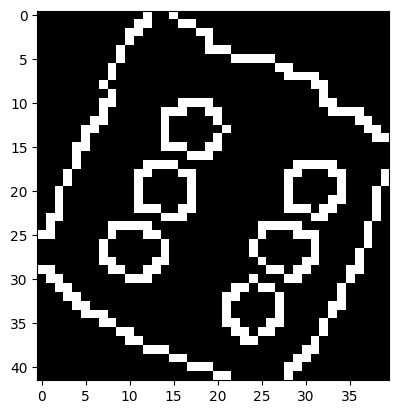

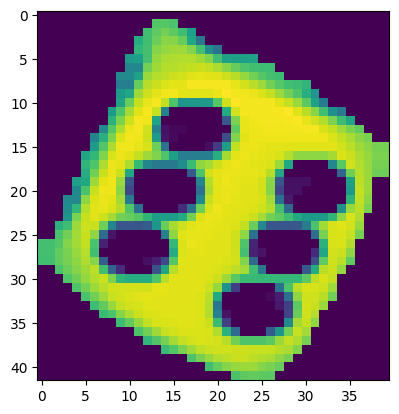

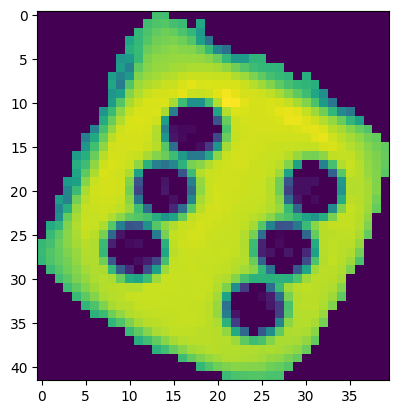

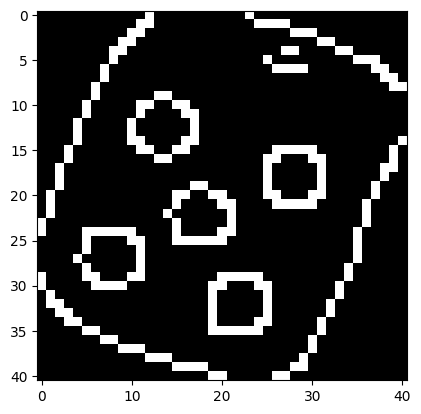

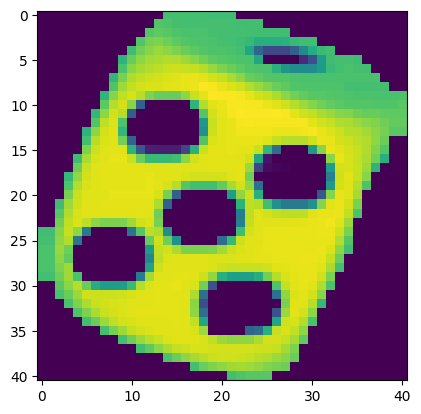

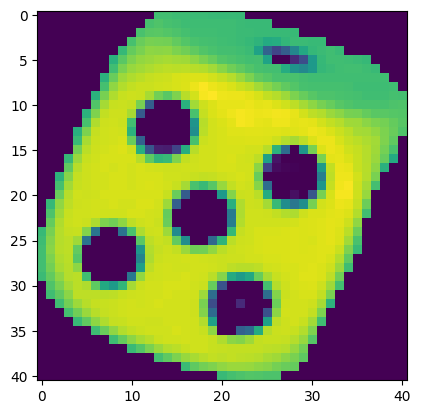

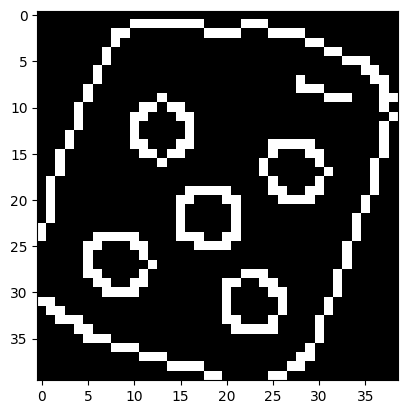

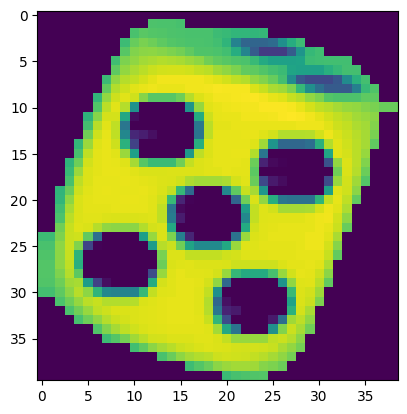

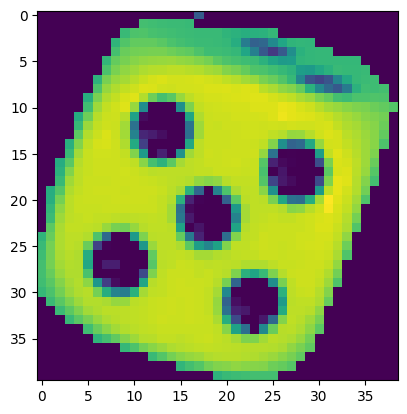

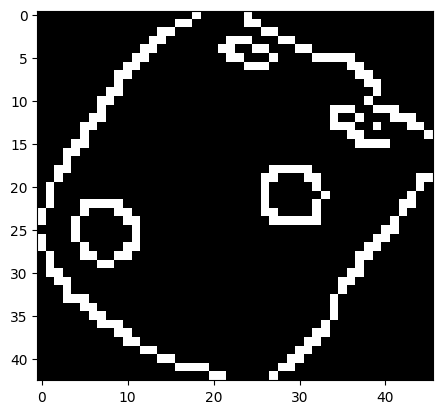

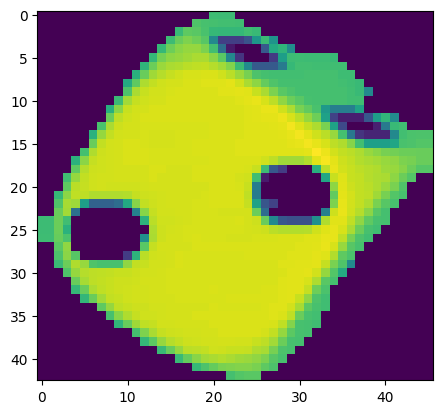

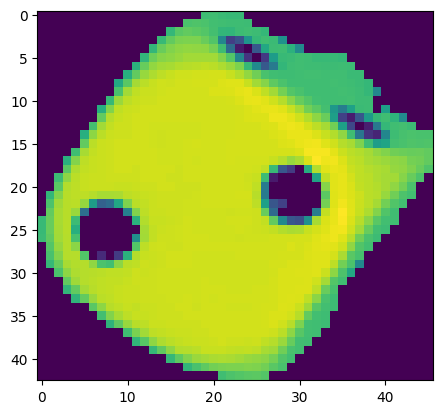

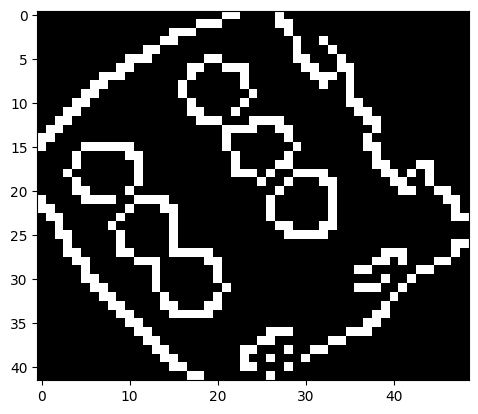

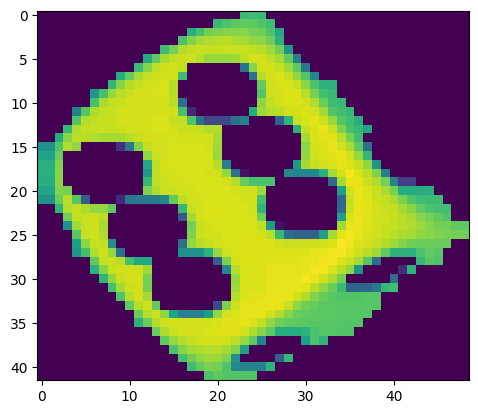

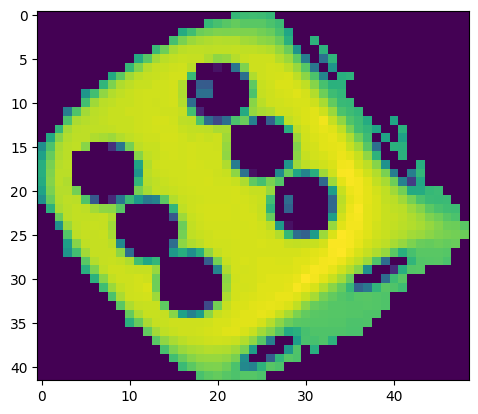

In [28]:
kernel=np.array([[0,0,0],[1,1,1],[0,0,0]], np.uint8)


for img in cropped_images:
    
    
    
    
    #kernel = np.ones((2,2), np.uint8)  # You can adjust the size of the kernel to your needs
    # Erode the cropped image
    eroded_image = cv2.erode(img, kernel, iterations = 1)
    
    edges = cv2.Canny(img, threshold1=400, threshold2=600)

    plt.imshow(edges, cmap='gray')
    plt.show()
    
    plt.imshow(eroded_image)
    plt.show()
    
    plt.imshow(img)
    plt.show()

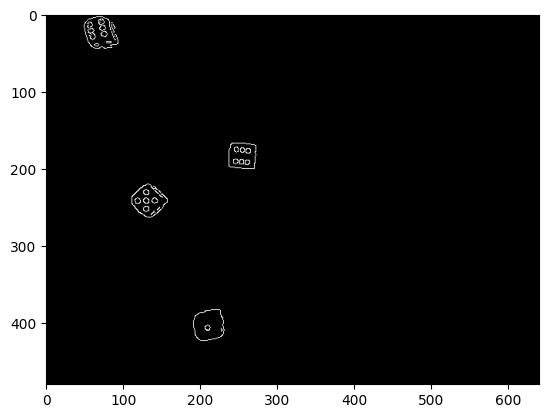

[[[133.1     256.30002   6.62   ]]]


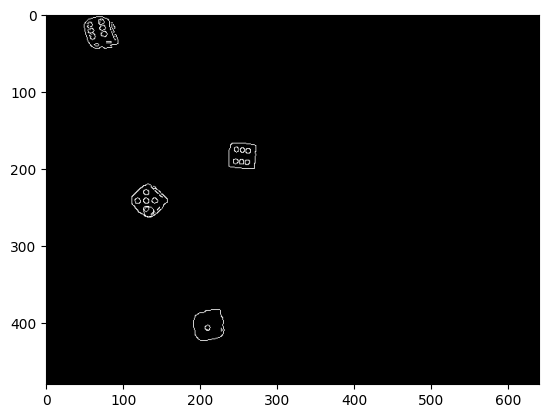

In [104]:
# Use HoughCircles to detect circles
cuttedgray2=cuttedgray.copy()

edges = cv2.Canny(cuttedgray2, threshold1=400, threshold2=600)

plt.imshow(edges, cmap='gray')
plt.show()

# Use HoughCircles to detect circles
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=2.2, minDist=1, param1=100, param2=30, minRadius=2, maxRadius=8)
print(circles)
# If some circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # Circle center
        radius = i[2]  # Circle radius
        cv2.circle(edges, center, radius, (255, 0, 0), 1,)  # Draw circle perimeter
        cv2.circle(edges, center, 2, (0, 0, 255), 1)  # Draw circle center

# Display the result using matplotlib
plt.imshow(edges, cmap='gray')

In [ ]:
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(testimdices_gray, connectivity=8)





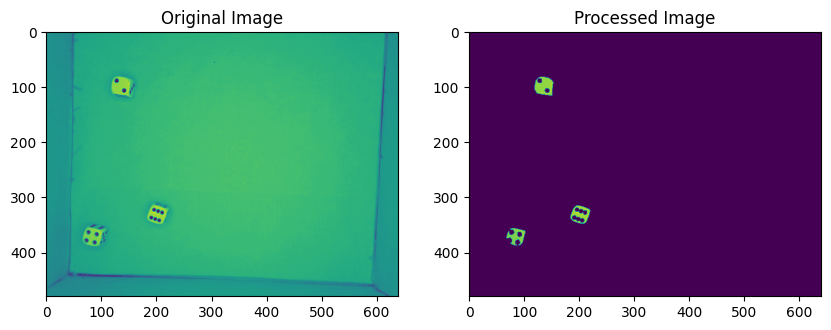

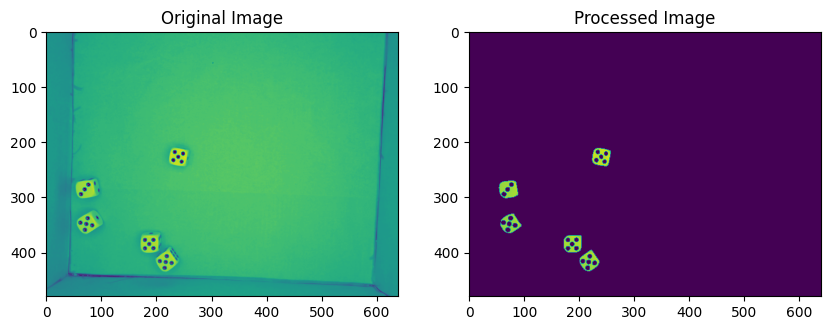

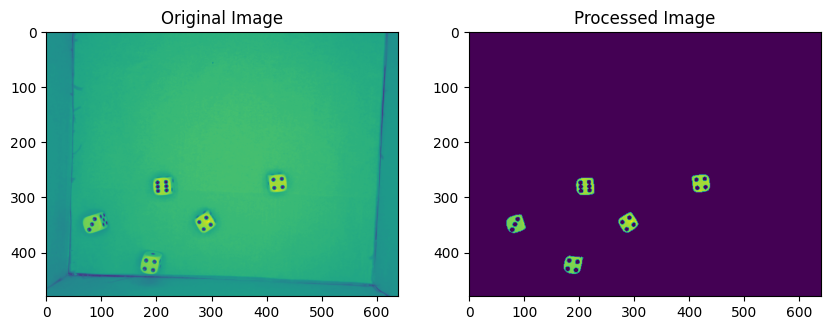

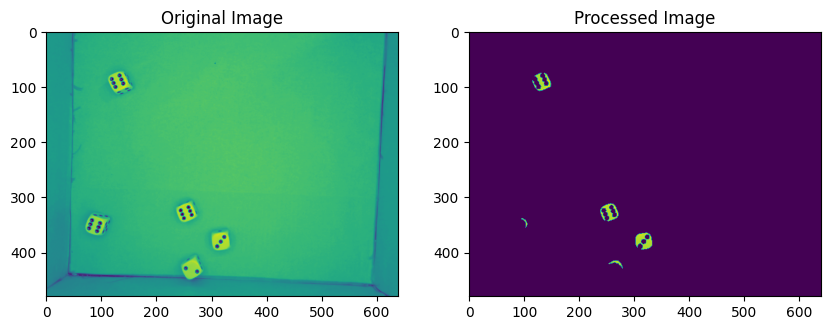

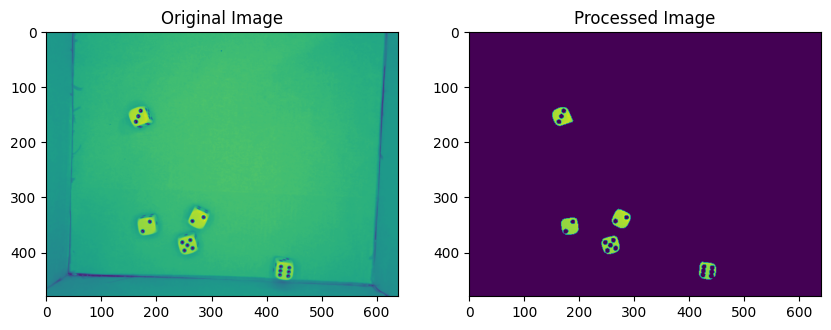

In [57]:

for testimdices in images[:5]:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(testimdices, cv2.COLOR_RGB2GRAY))
    axs[0].set_title('Original Image')

    testimdices_gray = cv2.cvtColor(testimdices, cv2.COLOR_RGB2GRAY)
    testimdices_gray[testimdices_gray[:, :] < 190] = 0

    axs[1].imshow(testimdices_gray)
    axs[1].set_title('Processed Image')

    plt.show()



array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

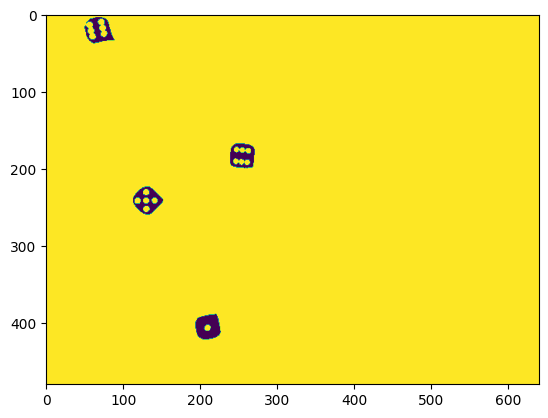

In [19]:
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(testimdices_gray, connectivity=8)

# Create an output image initialized to zero
output_image = np.zeros_like(testimdices_gray)

for i in range(1, num_labels):  # Start from 1 to ignore the background component
    if stats[i, cv2.CC_STAT_AREA] >= 50:
        output_image[labels == i] = 255  # Keep this connected component

# Invert the output image
output_image = 255 - output_image

plt.imshow(output_image)

output_image

In [102]:
num_labels

84

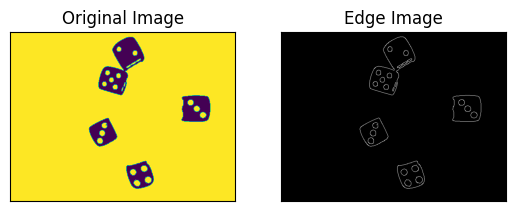

In [151]:

# apply Canny edge detector
edges = cv2.Canny(output_image, threshold1=300, threshold2=1100)

# display the original image and the edges
plt.subplot(121), plt.imshow(output_image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


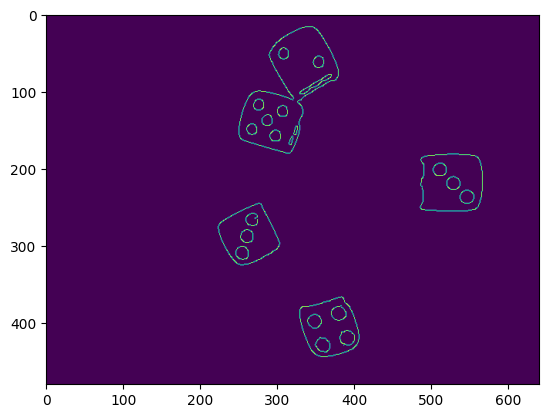

In [152]:
plt.imshow(edges)

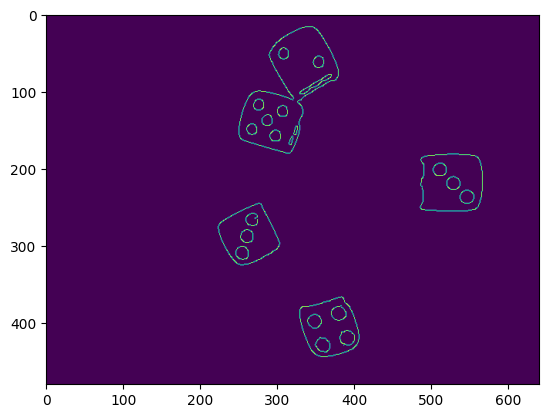

In [148]:
# Use HoughCircles to detect circles
circles = cv2.HoughCircles(output_image, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=5, maxRadius=100)

# If some circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # Circle center
        radius = i[2]  # Circle radius
        cv2.circle(edges, center, radius, (0, 255, 0), 2)  # Draw circle perimeter
        cv2.circle(edges, center, 2, (0, 0, 255), 3)  # Draw circle center

plt.imshow(edges)


[[[260.7       287.1         8.74     ]
  [390.5       419.1         8.74     ]
  [529.10004   218.90001     8.74     ]
  [546.7       236.5         8.74     ]
  [254.1       309.1         8.74     ]
  [379.5       388.30002     8.74     ]
  [511.5       201.3         8.74     ]
  [348.7       397.1         8.74     ]
  [298.1       157.3         8.08     ]
  [267.30002   148.5         7.42     ]
  [357.5       430.1         8.74     ]
  [276.1       117.700005    7.8599997]
  [267.30002   267.30002     8.74     ]
  [287.1       137.5         7.6400003]
  [306.9       126.5         6.1      ]
  [353.1        60.5         6.1      ]]]


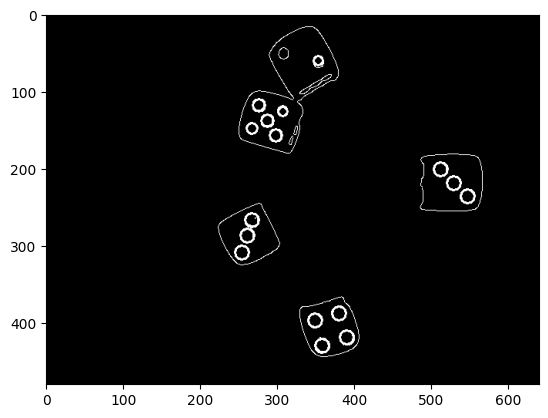

In [199]:


edges = cv2.Canny(output_image, threshold1=300, threshold2=1100)

# Use HoughCircles to detect circles
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=2.2, minDist=20, param1=100, param2=30, minRadius=5, maxRadius=10)
print(circles)
# If some circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # Circle center
        radius = i[2]  # Circle radius
        cv2.circle(edges, center, radius, (255, 0, 0), 2,)  # Draw circle perimeter
        cv2.circle(edges, center, 2, (0, 0, 255), 3)  # Draw circle center

# Display the result using matplotlib
plt.imshow(edges, cmap='gray')

In [141]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [125]:
circles

In [67]:
import numpy as np
# Convert the image to HSV (Hue, Saturation, Value) color space
hsv_bg_image = cv2.cvtColor(testimdbg, cv2.COLOR_RGB2HSV)

# Define the lower and upper bounds for the green color range
lower_bound = np.array([30, 100, 100])
upper_bound = np.array([60, 255, 255])

# Determine the color range in green
mask = cv2.inRange(hsv_bg_image, lower_bound, upper_bound)

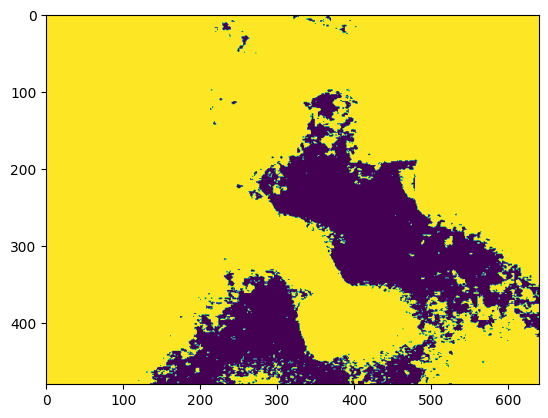

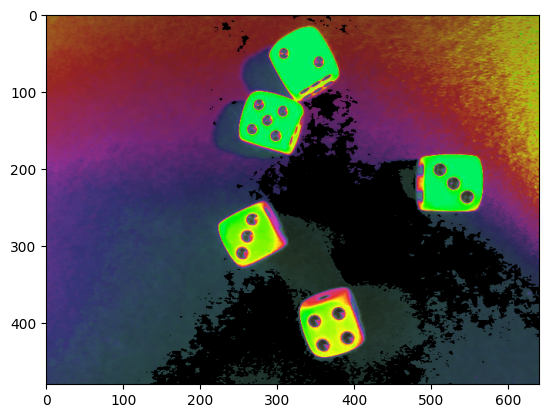

In [68]:
# Convert the image to HSV color space
hsv_dices_image = cv2.cvtColor(testimdices, cv2.COLOR_RGB2HSV)

# Create a mask of the green background
bg_mask = cv2.inRange(hsv_dices_image, lower_bound, upper_bound)

# Invert the mask to get the mask of the dices
dices_mask = cv2.bitwise_not(bg_mask)

# Remove the background from the dices image
dices_no_bg = cv2.bitwise_and(testimdices, testimdices, mask=dices_mask)

plt.imshow(dices_mask)
plt.show()
plt.imshow(cv2.cvtColor(dices_no_bg, cv2.COLOR_HSV2RGB))
plt.show()


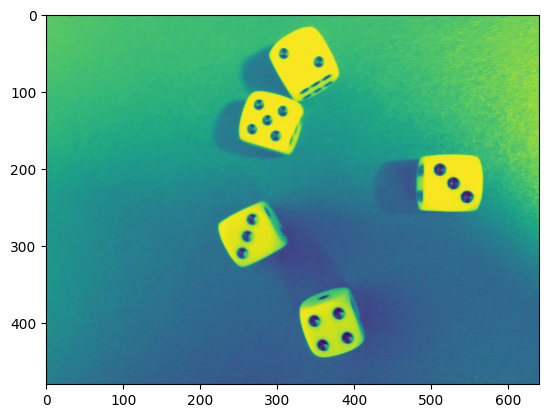

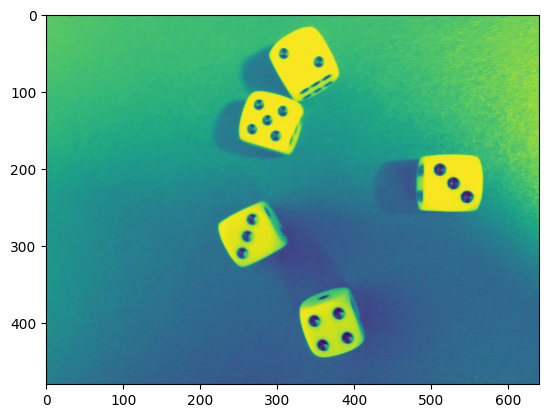

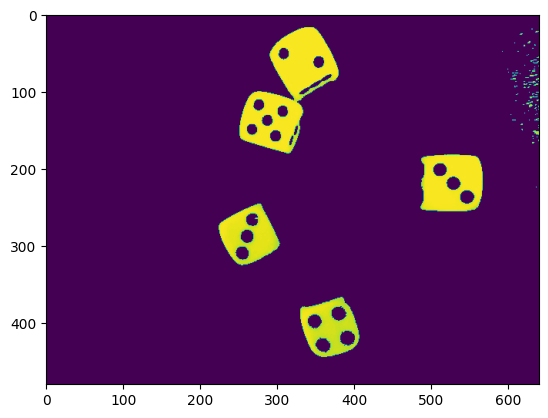

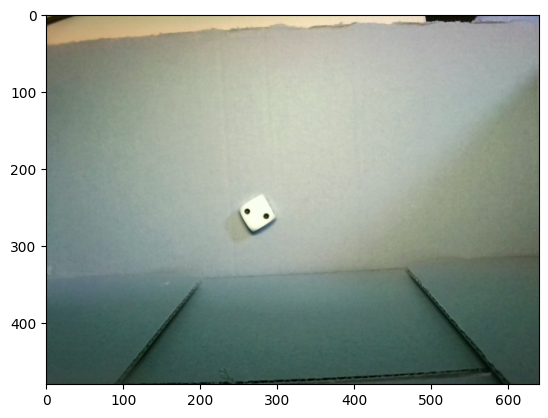

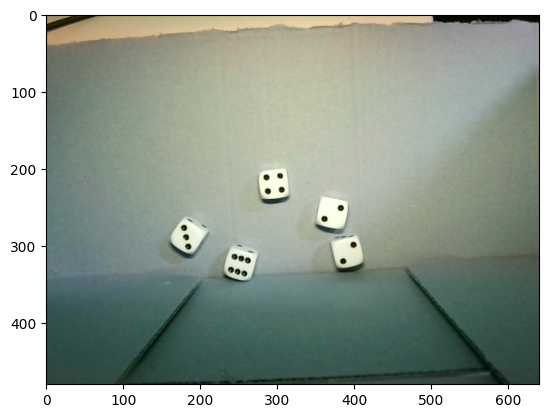

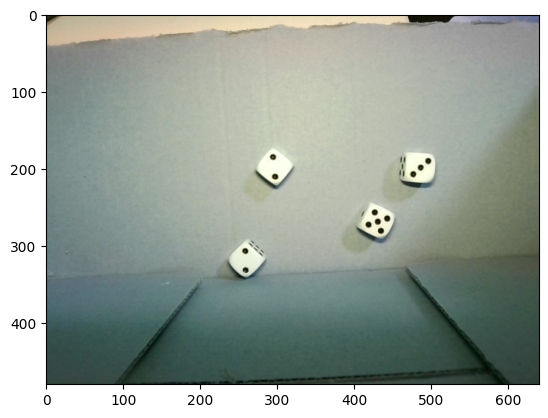

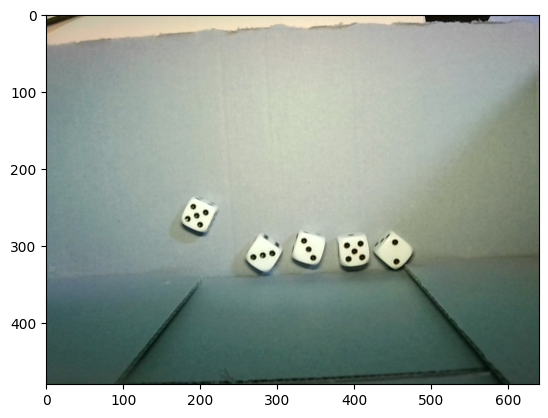

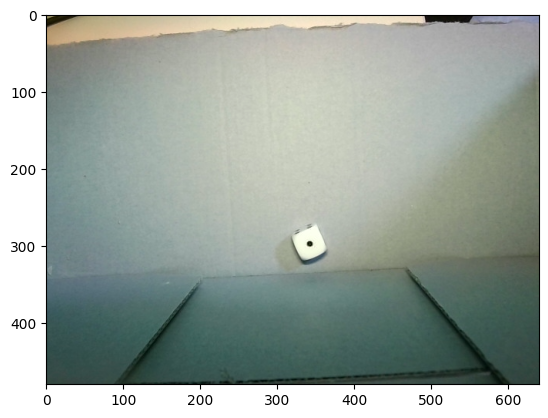

In [21]:
for img in images[:5]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [16]:
gray_images = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)


In [17]:
import numpy as np

gray_images = np.array(gray_images)
gray_images[gray_images > 100] = 255


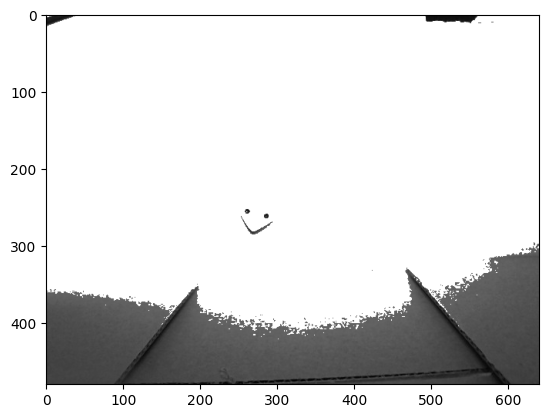

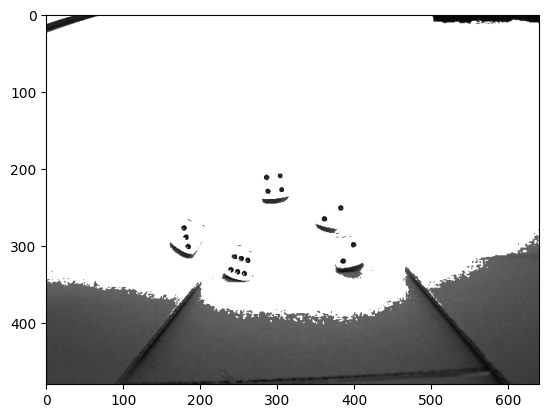

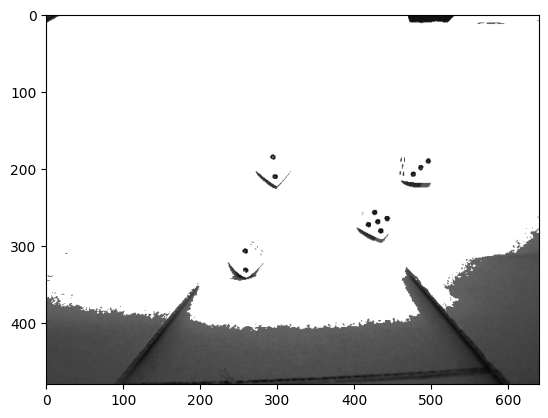

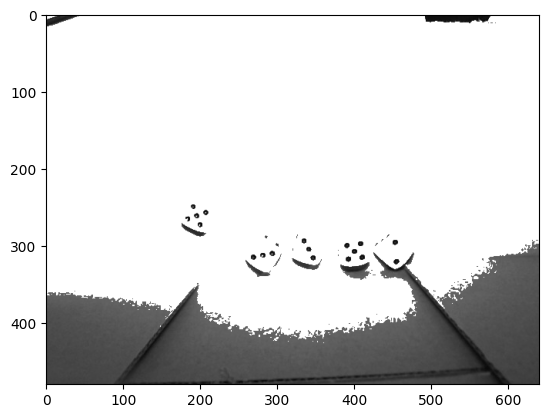

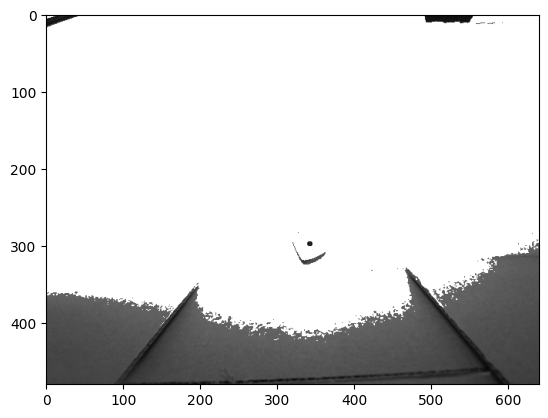

In [18]:
# display images
for img in gray_images[:5]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

